<a href="https://colab.research.google.com/github/myadav97/Microsoft-Stock-Predication/blob/main/F%26O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Importing the Libraries

In [8]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

##Step 2: Getting to Visualising the Stock Market Prediction Data

In [9]:
#Get the Dataset
df=pd.read_csv("/content/microsoft_data.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


##Step 3: Checking for Null Values by Printing the DataFrame Shape

In [14]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

# Output:
# Dataframe Shape: (9083, 6)
#Null Value Present: False

Dataframe Shape:  (9083, 6)
Null Value Present:  False


##Step 4: Plotting the True Adjusted Close Value

<Axes: xlabel='Date'>

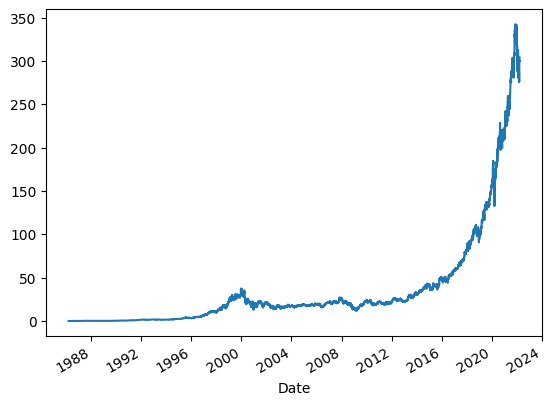

In [15]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

##Step 5: Setting the Target Variable and Selecting the Features

The output column is then assigned to the target variable in the following step. It is the adjusted relative value of Microsoft Stock in this situation. Furthermore, we pick the features that serve as the independent variable to the target variable (dependent variable). We choose four characteristics to account for training purposes:

- Open
- High
- Low
- Volume

In [16]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

##Step 6: Scaling

To decrease the computational cost of the data in the table, we will scale the stock values to values between 0 and 1. As a result, all of the data in large numbers is reduced, and therefore memory consumption is decreased. Also, because the data is not spread out in huge values, we can achieve greater precision by scaling down. To perform this, we will be using the MinMaxScaler class of the sci-kit-learn library.

In [17]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1986-03-13,0.000000,0.000027,0.000000,1.000000
1986-03-14,0.000025,0.000030,0.000025,0.297096
1986-03-17,0.000035,0.000032,0.000036,0.127119
1986-03-18,0.000040,0.000032,0.000030,0.063588
1986-03-19,0.000033,0.000025,0.000025,0.044285


As shown in the above table, the values of the feature variables are scaled down to lower values when compared to the real values given above.

##Step 7: Creating a Training Set and a Test Set for Stock Market Prediction

We must divide the entire dataset into training and test sets before feeding it into the training model. The Machine Learning LSTM model will be trained on the data in the training set and tested for accuracy and backpropagation on the test set.

The sci-kit-learn library’s TimeSeriesSplit class will be used for this. We set the number of splits to 10, indicating that 10% of the data will be used as the test set and 90% of the data will be used to train the LSTM model. The advantage of utilizing this Time Series split is that the split time series data samples are examined at regular time intervals.

In [18]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

##Step 8: Data Processing For LSTM
Once the training and test sets are finalized, we will input the data into the LSTM model. Before we can do that, we must transform the training and test set data into a format that the LSTM model can interpret. As the LSTM needs that the data to be provided in the 3D form, we first transform the training and test data to NumPy arrays and then restructure them to match the format (Number of Samples, 1, Number of Features). Now, 6667 are the number of samples in the training set, which is 90% of 7334, and the number of features is 4. Therefore, the training set is reshaped to reflect this (6667, 1, 4). Likewise, the test set is reshaped.

In [19]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

##Step 9: Building the LSTM Model for Stock Market Prediction
Finally, we arrive at the point when we construct the LSTM Model. In this step, we’ll build a Sequential Keras model with one LSTM layer. The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

We compile the model using Adam Optimizer and the Mean Squared Error as the loss function. For an LSTM model, this is the most preferred combination. The model is plotted and presented below.

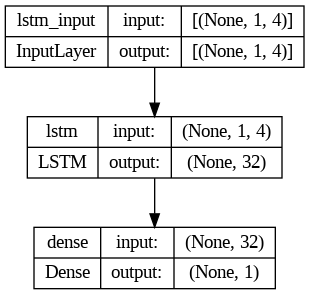

In [21]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)


##Step 10: Training the Stock Market Prediction Model
Finally, we use the fit function to train the LSTM model created above on the training data for 100 epochs with a batch size of 8.

In [23]:
history=lstm.fit(X_train, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False)

Epoch 1/200
1033/1033 [==============================] - 4s 3ms/step - loss: 0.8383
Epoch 2/200
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8385
Epoch 3/200
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8387
Epoch 4/200
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8390
Epoch 5/200
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8392
Epoch 6/200
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8394
Epoch 7/200
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8396
Epoch 8/200
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8399
Epoch 9/200
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8401
Epoch 10/200
1033/1033 [==============================] - 4s 4ms/step - loss: 0.8404
Epoch 11/200
1033/1033 [==============================] - 3s 3ms/step - loss: 0.8406
Epoch 12/200
1033/1033 [==============================] - 3s 3ms/step - lo

Finally, we can observe that the loss value has dropped exponentially over time over the 100-epoch training procedure, reaching a value of 0.8996.


##Step 11: Making the LSTM Prediction

In [25]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

26/26 [==============================] - 0s 2ms/step


##Step 12: Comparing Predicted vs True Adjusted Close Value – LSTM
Finally, now that we’ve projected the values for the test set, we can display the graph to compare both Adj Close’s true values and Adj Close’s predicted value using the LSTM Machine Learning model.

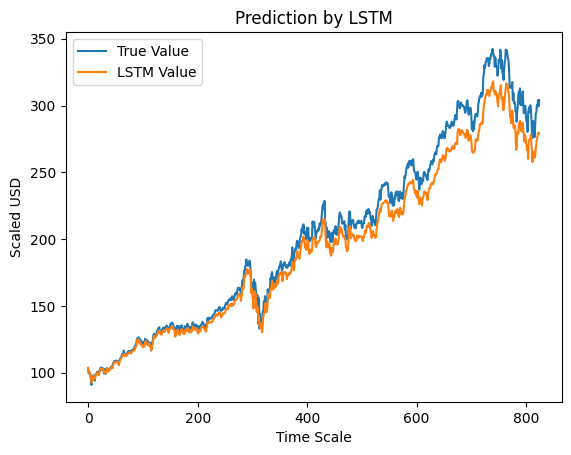

In [26]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

The graph above demonstrates that the extremely basic single LSTM network model created above detects some patterns. We may get a more accurate depiction of every specific company’s stock value by fine-tuning many parameters and adding more LSTM layers to the model.

##Conclusion

However, with the introduction of Machine Learning and its strong algorithms, the most recent market research and Stock Price Prediction using machine learning advancements have begun to include such approaches in analyzing stock market data. The Opening Value of the stock, the Highest and Lowest values of that stock on the same day, as well as the Closing Value at the end of the day are all indicated for each date. Furthermore, the total volume of the stocks in the market is provided; with this information, it is up to the job of a Machine Learning Data Scientist to look at the data and develop different algorithms that may help in finding appropriate stocks values.

Predicting the stock market was a time-consuming and laborious procedure a few years or even a decade ago. However, with the application of machine learning for stock market forecasts, the procedure has become much simpler. Machine learning not only saves time and resources but also outperforms people in terms of performance. it will always prefer to use a trained computer algorithm since it will advise you based only on facts, numbers, and data and will not factor in emotions or prejudice. It would be interesting to incorporate sentiment analysis on news & social media regarding the stock market in general, as well as a given stock of interest.

##Key Takeaways

- Stock Price Prediction using machine learning helps in discovering the future values of a company’s stocks and other assets.
- Predicting stock prices helps in gaining significant profits.